# Import Data and Libraries

In [2]:
# import libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats as stats

from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pydoc import help
from scipy.stats import chi2_contingency

In [3]:
df = pd.read_csv("AIR_POLLUTION.csv")
df.head()

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.03,0.0,2.30,249,63.2,995.1,0.0,5.70
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.29,0.0,2.26,265,63.2,998.6,0.0,3.83
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.18,0.0,1.79,280,65.3,998.3,0.0,6.29
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.35,0.0,2.04,263,58.6,996.6,0.0,2.54
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.30,0.0,1.45,175,45.5,993.5,0.0,3.92


#### Check Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MeasDate   366 non-null    object 
 1   PM10       365 non-null    float64
 2   O3         365 non-null    float64
 3   NO2        365 non-null    float64
 4   CO         311 non-null    float64
 5   SO2        365 non-null    float64
 6   TEMP       366 non-null    float64
 7   RAIN       366 non-null    float64
 8   WIND       366 non-null    float64
 9   WIND_DIR   366 non-null    int64  
 10  HUMIDITY   366 non-null    float64
 11  ATM_PRESS  366 non-null    float64
 12  SNOW       366 non-null    float64
 13  CLOUD      366 non-null    float64
dtypes: float64(12), int64(1), object(1)
memory usage: 40.2+ KB


In [6]:
df.describe()

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
count,365.000000,365.000000,365.000000,311.000000,365.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,33.421918,0.023600,0.026814,0.517042,0.003033,13.863798,0.381639,2.225301,209.450820,60.295082,1005.848907,0.022951,5.064016
std,15.937983,0.011896,0.010271,0.152820,0.000632,9.830280,1.122127,0.723171,70.735018,14.534983,8.126823,0.222361,2.986119
min,5.000000,0.002000,0.008000,0.300000,0.002000,-7.950000,0.000000,0.940000,50.000000,17.900000,983.800000,0.000000,0.000000
25%,22.000000,0.014000,0.019000,0.400000,0.003000,5.492500,0.000000,1.722500,160.250000,49.650000,999.400000,0.000000,2.510000
50%,31.000000,0.023000,0.025000,0.500000,0.003000,14.000000,0.000000,2.095000,221.000000,61.050000,1006.450000,0.000000,5.310000
75%,42.000000,0.032000,0.034000,0.600000,0.003000,23.070000,0.115000,2.620000,266.000000,69.950000,1011.575000,0.000000,7.570000
max,101.000000,0.062000,0.059000,1.000000,0.005000,31.720000,11.800000,5.880000,351.000000,95.000000,1025.500000,3.200000,10.000000


# Data Preparation

### 1) Data Cleansing

In [9]:
df['MeasDate'] = pd.to_datetime(df['MeasDate'])

# Measure Date into Year / Month / Day / Year_Month
df['Year'] = df['MeasDate'].dt.year
df['Month'] = df['MeasDate'].dt.month
df['Day'] = df['MeasDate'].dt.day
df['year_month'] = pd.to_datetime(df['MeasDate']).dt.to_period('M')

I want to make a new variable that shows 'season'. Here are the date range of each season.  
- 2019-07~2019-08 : Summer (2)
- 2019-09~2019-11 : Fall (3)
- 2019-12~2020-02 : Winter (0)
- 2020-03~2020-05 : Spring (1)
- 2020-06 : Summer (2)

In [11]:
# 0 : winter / 1 : spring / 2 : summer / 3: fall
df['Season'] = (df['Month'] // 3 ) % 4

In [12]:
df.head()

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD,Year,Month,Day,year_month,Season
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.03,0.0,2.30,249,63.2,995.1,0.0,5.70,2019,7,1,2019-07,2
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.29,0.0,2.26,265,63.2,998.6,0.0,3.83,2019,7,2,2019-07,2
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.18,0.0,1.79,280,65.3,998.3,0.0,6.29,2019,7,3,2019-07,2
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.35,0.0,2.04,263,58.6,996.6,0.0,2.54,2019,7,4,2019-07,2
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.30,0.0,1.45,175,45.5,993.5,0.0,3.92,2019,7,5,2019-07,2


#### Null Values

In [14]:
df.isnull().sum()

MeasDate       0
PM10           1
O3             1
NO2            1
CO            55
SO2            1
TEMP           0
RAIN           0
WIND           0
WIND_DIR       0
HUMIDITY       0
ATM_PRESS      0
SNOW           0
CLOUD          0
Year           0
Month          0
Day            0
year_month     0
Season         0
dtype: int64

([<matplotlib.axis.XTick at 0x151c6e540>,
 [Text(1, 0, 'Winter'),
  Text(2, 0, 'Spring'),
  Text(3, 0, 'Summer'),
  Text(4, 0, 'Fall')])

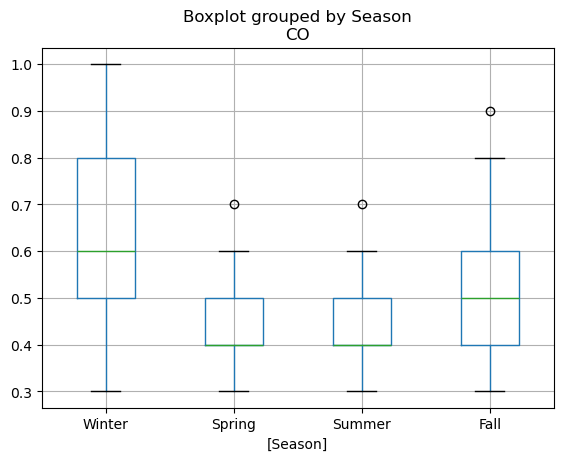

In [15]:
df.boxplot(column="CO", by = ["Season"])
# Customize x-axis labels
plt.xticks([1, 2, 3, 4], ["Winter", "Spring", "Summer", "Fall"])

In [16]:
from scipy.stats import f_oneway

# Group CO values by Season
winter = df[df['Season'] == 0]['CO']
spring = df[df['Season'] == 1]['CO']
summer = df[df['Season'] == 2]['CO']
fall = df[df['Season'] == 3]['CO']

# Perform one-way ANOVA test
anova_result = f_oneway(winter, spring, summer, fall)

# Extract F-statistic and p-value
f_statistic = round(anova_result.statistic, 3)
p_value = round(anova_result.pvalue, 3)

print(f"F-statistic: {f_statistic}, p-value: {p_value}")

F-statistic: nan, p-value: nan


The values are different between Seasons. Thus, in order to replace the Null values, it is better to replace by the 'seasonal' mean.

In [18]:
# For Null values, replace them with 'seasonal' meanF
df['CO'].groupby(df['Season']).mean()

Season
0    0.629670
1    0.447253
2    0.434545
3    0.525676
Name: CO, dtype: float64

In [19]:
df['CO'] = df['CO'].fillna(df.groupby("Season")["CO"].transform("mean"))

In [20]:
df['PM10'] = df['PM10'].fillna(df.groupby('Season')["PM10"].transform("mean"))
df['O3'] = df['O3'].fillna(df.groupby('Season')["O3"].transform("mean"))
df['NO2'] = df['NO2'].fillna(df.groupby('Season')["NO2"].transform("mean"))
df['SO2'] = df['SO2'].fillna(df.groupby('Season')["SO2"].transform("mean"))

In [21]:
df.isnull().sum()

MeasDate      0
PM10          0
O3            0
NO2           0
CO            0
SO2           0
TEMP          0
RAIN          0
WIND          0
WIND_DIR      0
HUMIDITY      0
ATM_PRESS     0
SNOW          0
CLOUD         0
Year          0
Month         0
Day           0
year_month    0
Season        0
dtype: int64

#### Identifying Outliers

/var/folders/j1/17055ftj3cn3s65tq24363mc0000gn/T/ipykernel_68267/1473798913.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([scaled_df[col] for col in scaled_df.columns], labels=scaled_df.columns)


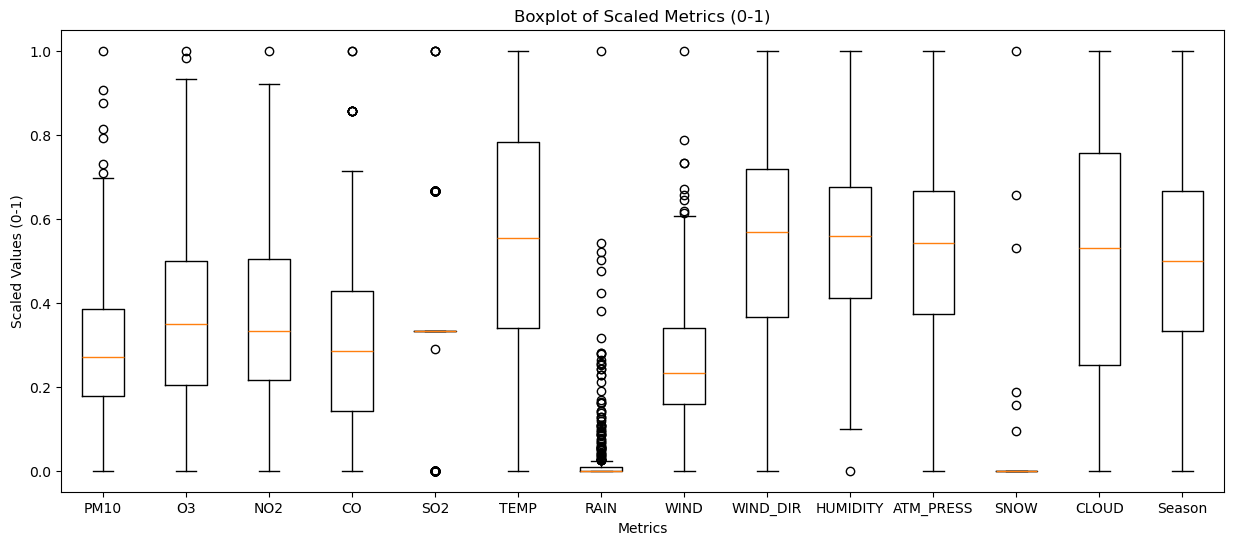

In [23]:
# Drop unwanted columns
cols_to_scale = df.drop(['MeasDate', 'Year', 'Month', 'Day', 'year_month'], axis=1)

# Scale data to range 0-1
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(cols_to_scale)

# Convert scaled data back to a DataFrame for easier handling
scaled_df = pd.DataFrame(scaled_data, columns=cols_to_scale.columns)

# Create figure and axes
fig, ax = plt.subplots(figsize=(15, 6))  # Adjust width (8) and height (6) as needed

# Create the boxplot
ax.boxplot([scaled_df[col] for col in scaled_df.columns], labels=scaled_df.columns)

# Set title and axis labels for better readability
ax.set_title('Boxplot of Scaled Metrics (0-1)')
ax.set_xlabel('Metrics')
ax.set_ylabel('Scaled Values (0-1)')

# Show the plot
plt.show()

In [24]:
def outlier_iqr(data, column):
    # declaring lower, upper as a global varialbe
    global lower, upper

    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)

    # calculating IQR
    iqr = q75 - q25

    # calculating the outlier cutoff
    cut_off = iqr * 1.5

    # lower & upper bound
    lower, upper = q25 - cut_off, q75 + cut_off

    print('IQR is', iqr.round(3))
    print('lower bound is', lower.round(3))
    print('upper bound is', upper.round(3))

    data1 = data[data[column]>upper]
    data2 = data[data[column]<lower]

    return print('Total outliers are', data1.shape[0] + data2.shape[0])

In [25]:
outlier_iqr(df, 'PM10')

IQR is 20.0
lower bound is -8.0
upper bound is 72.0
Total outliers are 7


<Axes: >

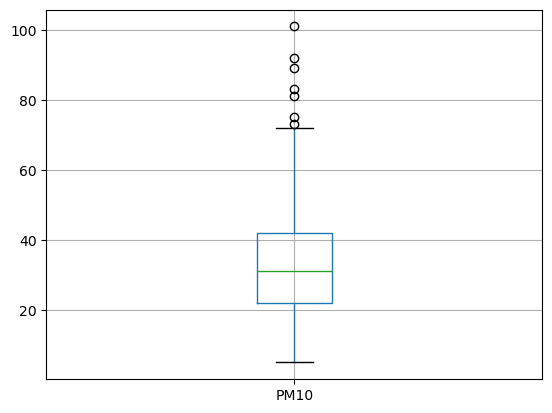

In [26]:
df.boxplot('PM10')

### 2) Derived Variables

- According to PM10 values, group into good, normal, bad, very bad in accordance with WHO standard
- Season (done in the part above)
- WIND_DIR to be more specific (N, S, W, E, NE, SE, SW, NW)
- RAIN and SNOW variables to shown as 0, 1 (0: not rained/snowed, 1: rained/snowed)

In [29]:
df.loc[df['PM10'] < 20, 'PM10_WHO'] = 'good'
df.loc[(df['PM10'] >= 20) & (df['PM10'] < 46), 'PM10_WHO'] = 'normal'
df.loc[(df['PM10'] >= 46) & (df['PM10'] < 76), 'PM10_WHO'] = 'bad'
df.loc[(df['PM10'] >= 76), 'PM10_WHO'] = 'very bad'

In [30]:
df.loc[(df['WIND_DIR']>=22.5) & (df['WIND_DIR']<67.5), 'WIND_DIR_1'] = 'NE'
df.loc[(df['WIND_DIR']>=67.5) & (df['WIND_DIR']<112.5), 'WIND_DIR_1'] = 'E'
df.loc[(df['WIND_DIR']>=112.5) & (df['WIND_DIR']<157.5), 'WIND_DIR_1'] = 'SE'
df.loc[(df['WIND_DIR']>=157.5) & (df['WIND_DIR']<202.5), 'WIND_DIR_1'] = 'S'
df.loc[(df['WIND_DIR']>=202.5) & (df['WIND_DIR']<247.5), 'WIND_DIR_1'] = 'SW'
df.loc[(df['WIND_DIR']>=247.5) & (df['WIND_DIR']<292.5), 'WIND_DIR_1'] = 'W'
df.loc[(df['WIND_DIR']>=292.5) & (df['WIND_DIR']<337.5), 'WIND_DIR_1'] = 'NW'
df.loc[(df['WIND_DIR']>=337.5) | (df['WIND_DIR']<22.5), 'WIND_DIR_1'] = 'N'

In [31]:
df.loc[(df['SNOW']> 0), 'SNOW1'] = '1'
df.loc[(df['SNOW']== 0), 'SNOW1'] = '0'
df.loc[(df['RAIN']> 0), 'RAIN1'] = '1'
df.loc[(df['RAIN']== 0), 'RAIN1'] = '0'
df.head()

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,...,CLOUD,Year,Month,Day,year_month,Season,PM10_WHO,WIND_DIR_1,SNOW1,RAIN1
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.03,0.0,2.30,249,...,5.70,2019,7,1,2019-07,2,normal,W,0,0
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.29,0.0,2.26,265,...,3.83,2019,7,2,2019-07,2,normal,W,0,0
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.18,0.0,1.79,280,...,6.29,2019,7,3,2019-07,2,normal,W,0,0
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.35,0.0,2.04,263,...,2.54,2019,7,4,2019-07,2,normal,W,0,0
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.30,0.0,1.45,175,...,3.92,2019,7,5,2019-07,2,normal,S,0,0


# EDA

### Data Visualization

#### Target Variable(Y): PM10)

/var/folders/j1/17055ftj3cn3s65tq24363mc0000gn/T/ipykernel_68267/3857699038.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=13)


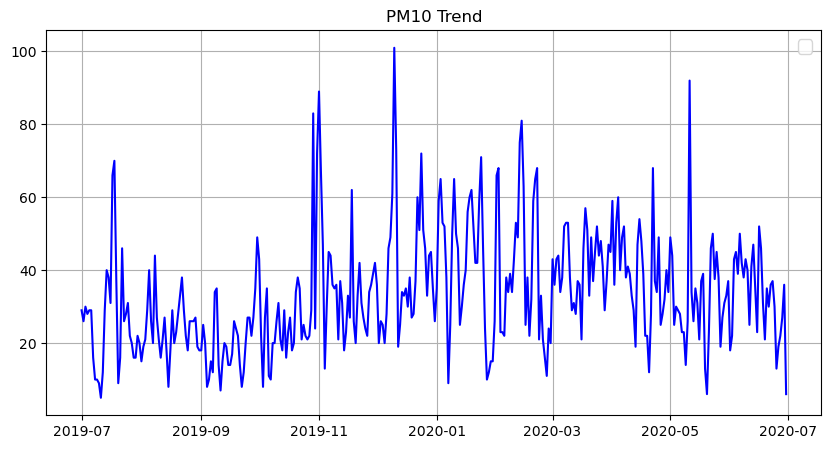

In [35]:
plt.figure(figsize=(10,5))
plt.title("PM10 Trend")
plt.plot(df['MeasDate'], df["PM10"], "-", color='blue')
plt.grid()
plt.legend(fontsize=13)
plt.show()

array([[<Axes: title={'center': 'PM10'}>]], dtype=object)

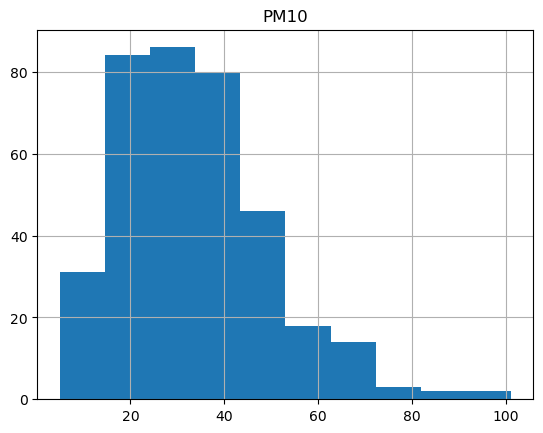

In [36]:
df.hist(['PM10'])

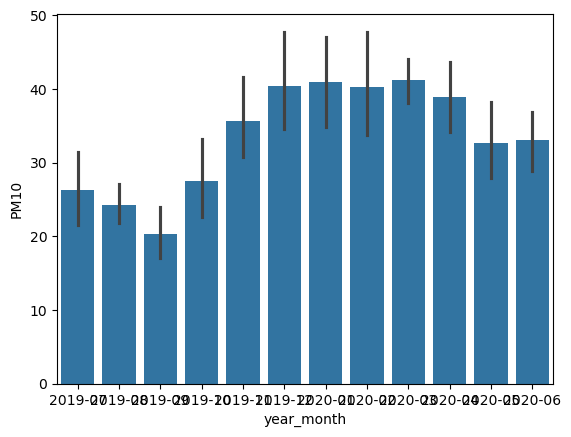

In [37]:
graph1 = sns.barplot(x='year_month', y='PM10', data=df)

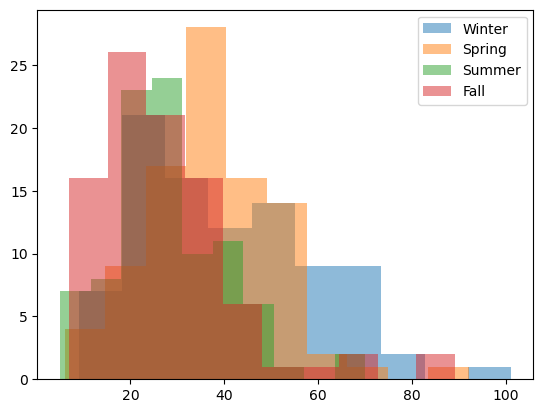

In [38]:
plt.hist(df[df["Season"]==0]["PM10"], label ='Winter', alpha = 0.5)
plt.hist(df[df["Season"]==1]["PM10"], label ='Spring', alpha = 0.5)
plt.hist(df[df["Season"]==2]["PM10"], label ='Summer', alpha = 0.5)
plt.hist(df[df["Season"]==3]["PM10"], label ='Fall', alpha = 0.5)
plt.legend()

#### Dependent Variables

array([[<Axes: title={'center': 'MeasDate'}>,
        <Axes: title={'center': 'PM10'}>, <Axes: title={'center': 'O3'}>,
        <Axes: title={'center': 'NO2'}>],
       [<Axes: title={'center': 'CO'}>, <Axes: title={'center': 'SO2'}>,
        <Axes: title={'center': 'TEMP'}>,
        <Axes: title={'center': 'RAIN'}>],
       [<Axes: title={'center': 'WIND'}>,
        <Axes: title={'center': 'WIND_DIR'}>,
        <Axes: title={'center': 'HUMIDITY'}>,
        <Axes: title={'center': 'ATM_PRESS'}>],
       [<Axes: title={'center': 'SNOW'}>,
        <Axes: title={'center': 'CLOUD'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>],
       [<Axes: title={'center': 'Day'}>,
        <Axes: title={'center': 'Season'}>, <Axes: >, <Axes: >]],
      dtype=object)

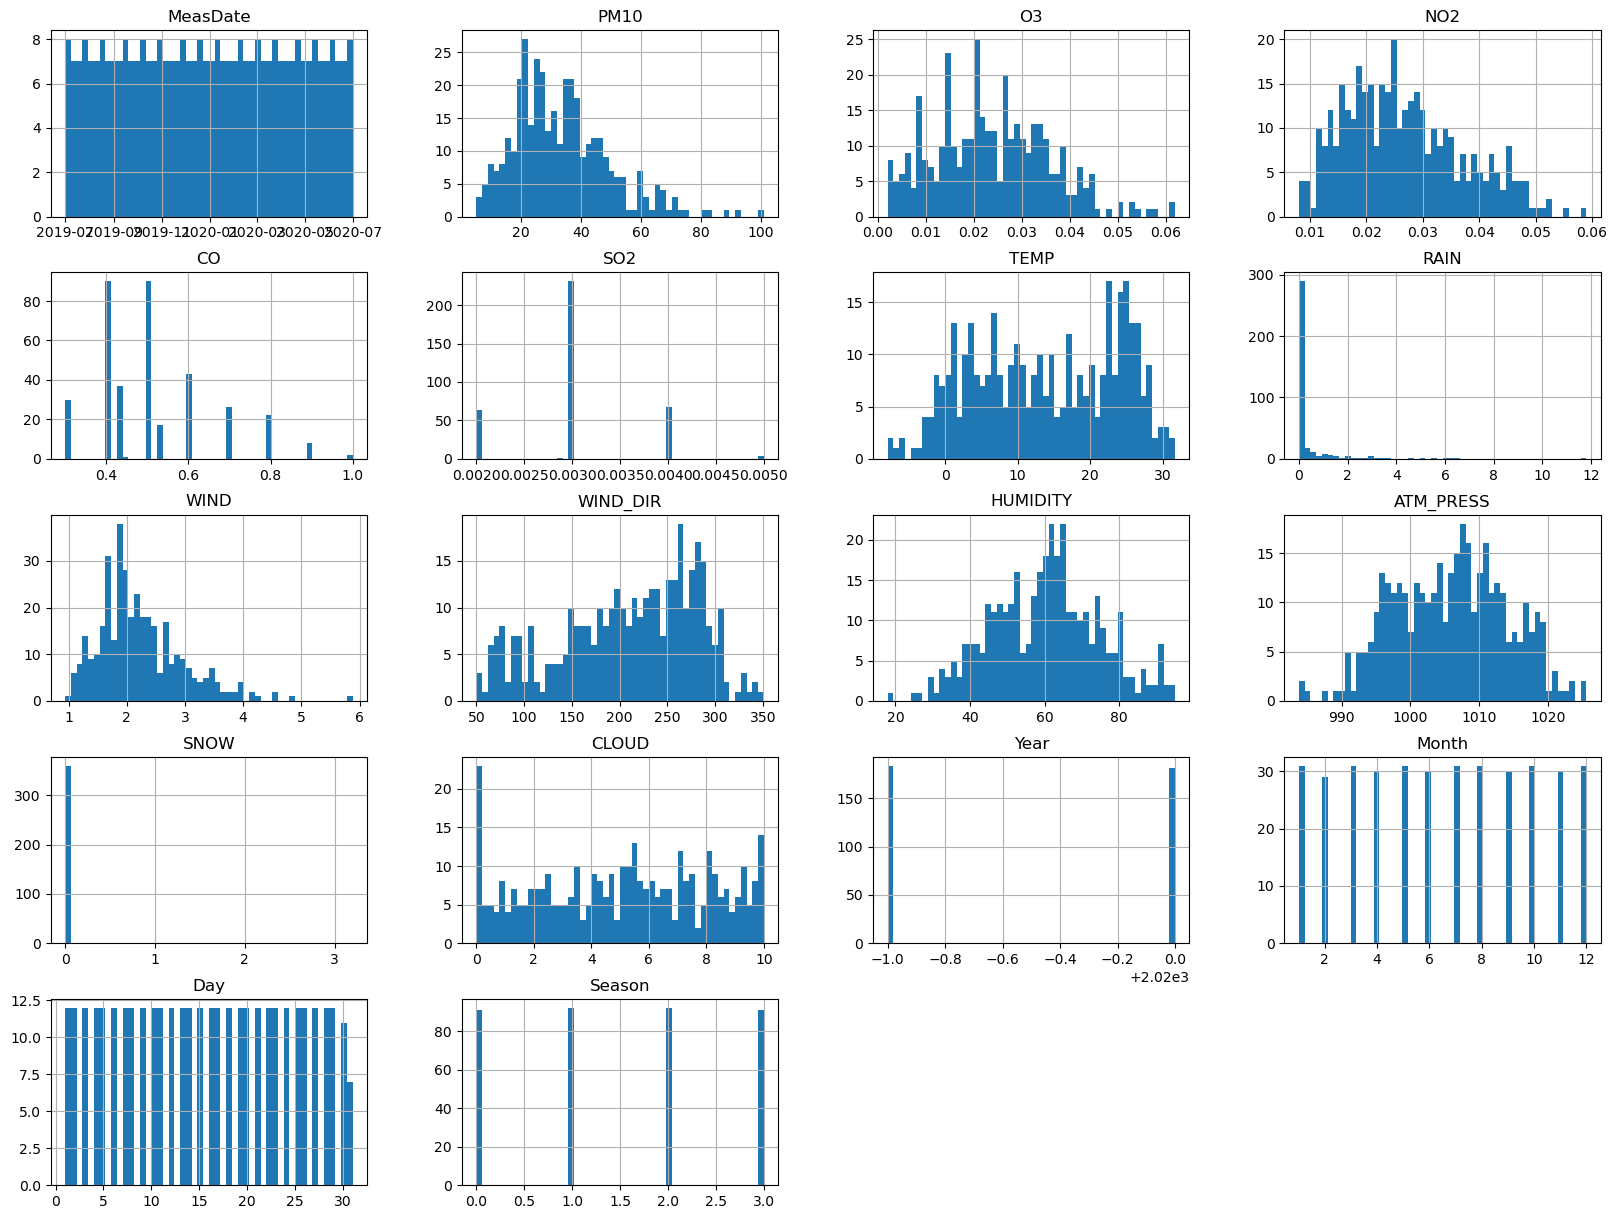

In [40]:
df.hist(bins=50, figsize=(20,15))

Dependent variables can be grouped by two, according to their characteristics

Atmospheric: TEMP, RAIN, WIND, WIND_DIR, HUMIDITY, ATM_PRESS, SNOW, CLOUD  
Meteorological: O3, NO2, CO, SO2

In [42]:
df_at = df[["PM10", "O3", "NO2", "CO", "SO2"]] # atmospheric variable
df_met = df[["PM10", "TEMP", "RAIN", "WIND", "WIND_DIR", "HUMIDITY", "ATM_PRESS", "SNOW", "CLOUD"]] # weather variable

<Axes: >

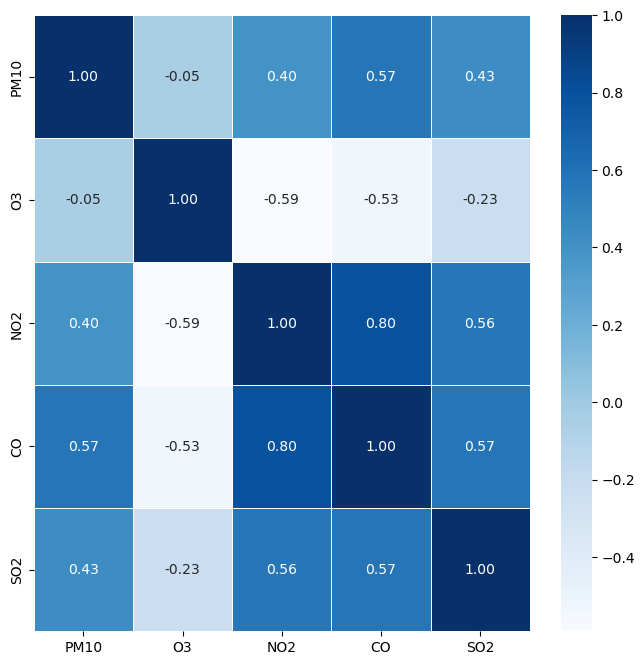

In [43]:
plt.figure(figsize=(8,8))
sns.heatmap(data = df_at.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

NO2, CO, SO2 has a positive correlation with PM10. NO2, CO, SO2 seems to have high correlation between each other.

<Axes: >

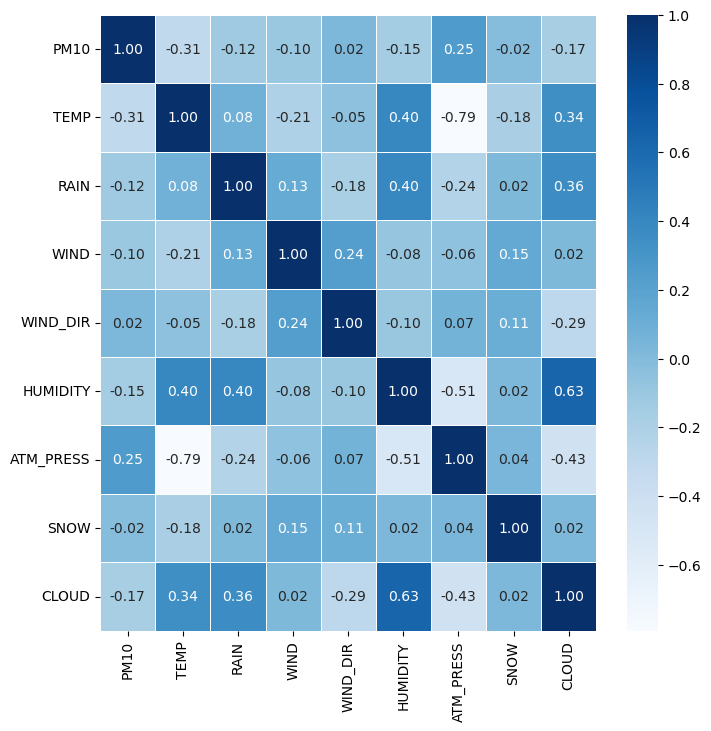

In [45]:
plt.figure(figsize=(8,8))
sns.heatmap(data = df_met.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

Unlike atmospheric variables, it was difficult to observe a clear correlation between meteorological variables and fine dust. However, a correlation was observed between CLOUD and HUMIDITY among the independent variables.  
A histogram is a graph that allows us to check the distribution, patterns, and outliers by intervals. Looking at the graphs above, variables such as fine dust (PM10), ozone (O3), nitrogen dioxide (NO2), humidity (HUMIDITY), and atmospheric pressure (ATM_PRESS) show patterns similar to a normal distribution, which seem meaningful.  
Among these, to examine the relationship between air pollution and fine dust, the relationships between PM10 and O3 / NO2 / CO / SO2 will be analyzed.

[]

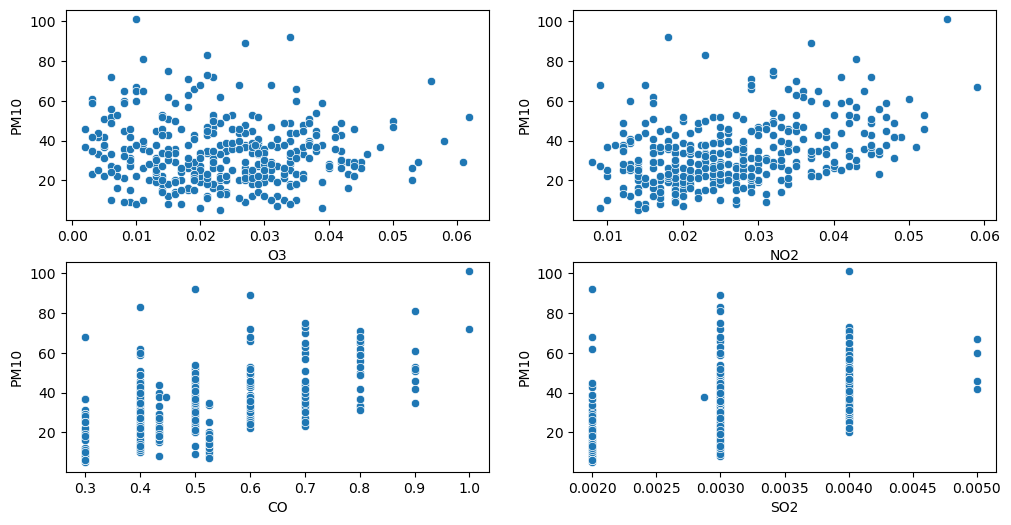

In [47]:
f, ax = plt.subplots(2, 2, figsize=(12,6))
sns.scatterplot(x='O3', y='PM10', data=df, ax=ax[0,0])
sns.scatterplot(x='NO2', y='PM10', data=df, ax=ax[0,1])
sns.scatterplot(x='CO', y='PM10', data=df, ax=ax[1,0])
sns.scatterplot(x='SO2', y='PM10', data=df, ax=ax[1,1])
plt.plot()

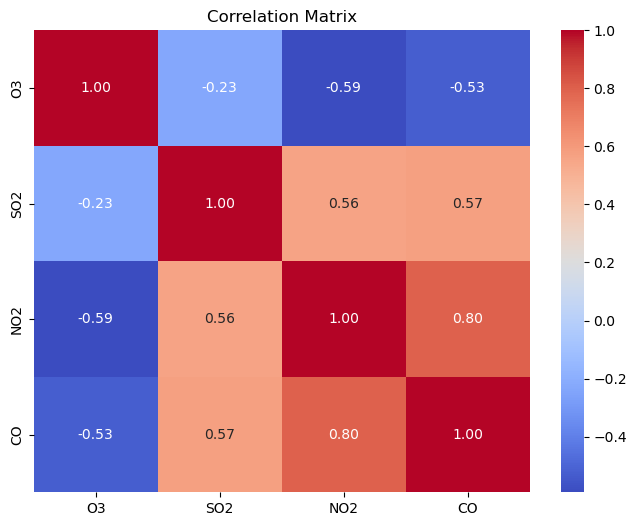

In [48]:
# Compute the correlation matrix
correlation_matrix = df[['O3', 'SO2', 'NO2', 'CO']].corr()

# Plot a heatmap to visualize the correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

<Axes: title={'center': 'ATM_PRESS'}, xlabel='[Season]'>

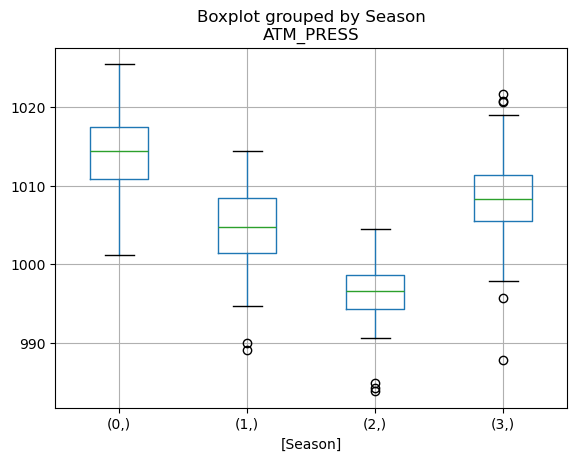

In [49]:
df.boxplot(column="ATM_PRESS", by = ['Season'])

우리 나라에 영향을 주는 고기압으로는 겨울의 시베리아 고기압과 여름의 태평양 고기압이 있는데 이들은 정체성 고기압으로 같은 장소에 오래 머물러 있으면서 계절에 따라 발달하거나 쇠약해진다.


일반적으로 편서풍이 부나, 정체성 고기압과 같은 기타 요인에 의해서 풍향이 달라질 수 있다.

고기압은 상대적으로 기압이 높은 곳이며 저기압은 상대적으로 기압이 낮은 곳을 뜻한다. 고기압은 하강기류이며 저기압은 상승기류이다. 고기압일 때 날씨는 대체로 맑으며, 저기압일 때는 비나 눈이 내리는 경우가 많다.

#### Wind Direction

/var/folders/j1/17055ftj3cn3s65tq24363mc0000gn/T/ipykernel_68267/3731376053.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='PM10_WHO', order=df['PM10_WHO'].value_counts().index,


<Axes: xlabel='PM10_WHO', ylabel='count'>

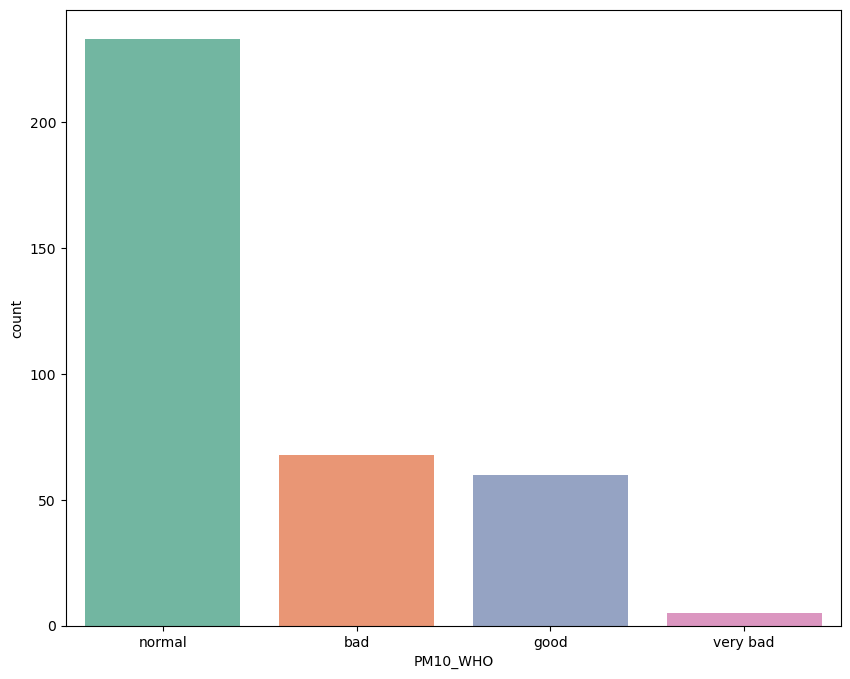

In [52]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='PM10_WHO', order=df['PM10_WHO'].value_counts().index,
              palette='Set2')

In [53]:
df_vb = df.loc[(df['PM10_WHO'] == 'very bad')]
df.head()

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,...,CLOUD,Year,Month,Day,year_month,Season,PM10_WHO,WIND_DIR_1,SNOW1,RAIN1
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.03,0.0,2.30,249,...,5.70,2019,7,1,2019-07,2,normal,W,0,0
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.29,0.0,2.26,265,...,3.83,2019,7,2,2019-07,2,normal,W,0,0
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.18,0.0,1.79,280,...,6.29,2019,7,3,2019-07,2,normal,W,0,0
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.35,0.0,2.04,263,...,2.54,2019,7,4,2019-07,2,normal,W,0,0
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.30,0.0,1.45,175,...,3.92,2019,7,5,2019-07,2,normal,S,0,0


In [54]:
df_b = df.loc[(df['PM10_WHO'] == 'bad')]
df_b.describe()

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD,Year,Month,Day,Season
count,68,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,2020-02-06 07:24:42.352941056,55.691176,0.022265,0.032765,0.639706,0.003485,8.868824,0.173382,2.157206,203.411765,57.080882,1008.666176,0.004412,4.546324,2019.750000,4.750000,14.779412,0.764706
min,2019-07-17 00:00:00,46.000000,0.002000,0.009000,0.300000,0.002000,-2.500000,0.000000,1.050000,66.000000,34.200000,994.500000,0.000000,0.000000,2019.000000,1.000000,1.000000,0.000000
25%,2019-12-31 06:00:00,49.000000,0.010750,0.025000,0.500000,0.003000,2.315000,0.000000,1.720000,160.000000,47.500000,1005.225000,0.000000,2.687500,2019.750000,2.000000,7.750000,0.000000
50%,2020-02-06 12:00:00,52.500000,0.021500,0.033000,0.600000,0.003000,6.830000,0.000000,1.980000,205.500000,60.450000,1008.250000,0.000000,4.895000,2020.000000,3.500000,16.000000,1.000000
75%,2020-03-30 12:00:00,62.000000,0.031000,0.041250,0.800000,0.004000,13.125000,0.000000,2.305000,254.250000,64.700000,1013.200000,0.000000,6.760000,2020.000000,6.250000,22.000000,1.000000
max,2020-06-17 00:00:00,75.000000,0.062000,0.059000,1.000000,0.005000,27.040000,5.930000,4.560000,300.000000,85.400000,1022.300000,0.300000,9.880000,2020.000000,12.000000,31.000000,3.000000
std,NaN,8.431033,0.013610,0.010995,0.162205,0.000635,8.096407,0.761963,0.735129,60.238391,11.375862,6.656466,0.036380,2.610518,0.436232,3.810336,8.341312,0.916151


I wanted to check, if PM10 is defined as 'bad' and 'very bad', where the wind direction is from.

<Axes: >

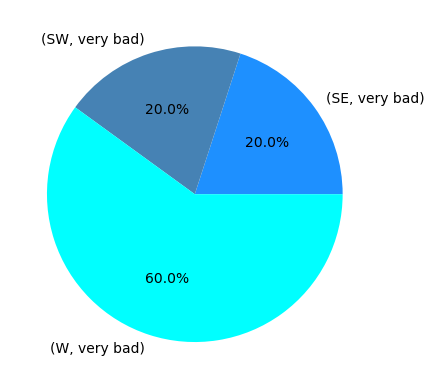

In [56]:
df_count1 = df_vb.groupby(["WIND_DIR_1", "PM10_WHO"]).size()
colors = ['dodgerblue', 'steelblue', 'cyan', 'paleturquoise', 'powderblue', 'cadetblue']

df_count1.plot.pie(y="PM10", autopct="%.1f%%", colors=colors)

<Axes: >

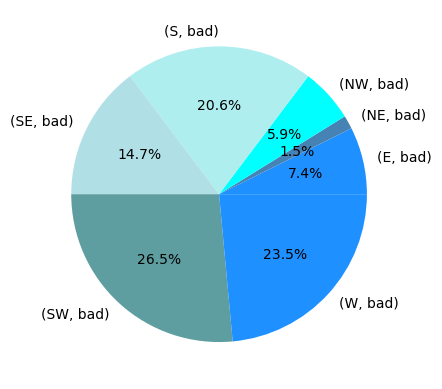

In [57]:
df_count2 = df_b.groupby(["WIND_DIR_1", "PM10_WHO"]).size()
colors = ['dodgerblue', 'steelblue', 'cyan', 'paleturquoise', 'powderblue', 'cadetblue']

df_count2.plot.pie(y="PM10", autopct="%.1f%%", colors=colors)

When PM10 is categorized and 'bad' and 'very bad', more than 50% time the wind direction is from the west. (W, SW, NW all included)

Correlation Analysis

In [60]:
def corr_ana(corr, pval):
    corr, pval = stats.pearsonr(corr, pval)
    print("Correlation Analysis")
    print("corr:{0:0.3f}".format(corr))
    print("p-value:{0:0.3f}".format(pval))

PM10

In [62]:
corr_ana(df['PM10'], df["O3"])

Correlation Analysis
corr:-0.051
p-value:0.326


In [63]:
corr_ana(df['PM10'], df["ATM_PRESS"])

Correlation Analysis
corr:0.252
p-value:0.000


In [64]:
corr_ana(df['PM10'], df["NO2"])

Correlation Analysis
corr:0.396
p-value:0.000


In [65]:
corr_ana(df['PM10'], df["CO"])

Correlation Analysis
corr:0.573
p-value:0.000


In [66]:
corr_ana(df['PM10'],df["SO2"])

Correlation Analysis
corr:0.428
p-value:0.000


O3

In [68]:
corr_ana(df['O3'], df["NO2"])

Correlation Analysis
corr:-0.592
p-value:0.000


In [69]:
corr_ana(df['O3'], df["CO"])

Correlation Analysis
corr:-0.529
p-value:0.000


In [70]:
corr_ana(df['O3'], df["SO2"])

Correlation Analysis
corr:-0.234
p-value:0.000


# Model

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import graphviz
from sklearn.tree import export_graphviz

#### 1) Multiple Linear Regression

In [74]:
reg_model = smf.ols(formula = "PM10 ~ O3 + NO2 + CO + WIND + WIND_DIR  \
                    + HUMIDITY + ATM_PRESS + CLOUD + Year + Season", data=df)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     40.67
Date:                Tue, 31 Dec 2024   Prob (F-statistic):           5.13e-53
Time:                        16:07:52   Log-Likelihood:                -1392.0
No. Observations:                 366   AIC:                             2806.
Df Residuals:                     355   BIC:                             2849.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9404.8628   3244.763     -2.898      0.0

In [75]:
df_raw = df[['PM10', 'O3', 'NO2', 'CO', 'WIND', 'WIND_DIR', 'HUMIDITY', 'ATM_PRESS', 'CLOUD', 'Year', 'Season']]

df_raw_x = df.drop("PM10", axis = 1, inplace = False)
df_raw_y = df["PM10"] 

In [76]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, # 설명변수 데이터
                                                                df_raw_y, # 목표변수 데이터
                                                                test_size = 0.2, # test 데이터의 비율
                                                                random_state = 1234)  # random state
print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (292, 22)
train data Y size: (292,)
test data X size: (74, 22)
test data Y size: (74,)


In [77]:
reg_y_pred = reg_result.predict(df_test_x)
y_pred = reg_model.fit()

In [78]:
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 
    
MAPE(df_test_y, reg_y_pred)

25.279646399067424

The MAPE value is 25.28, which is below 50, indicating that the prediction is very reasonable (Tofallis, 2016).

#### 2) Random Forest

In [81]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,PM10,O3,NO2,CO,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,CLOUD,Year,Season
0,29.0,0.054,0.021,0.5,2.30,249,63.2,995.1,5.70,2019,2
1,26.0,0.053,0.020,0.5,2.26,265,63.2,998.6,3.83,2019,2
2,30.0,0.042,0.023,0.4,1.79,280,65.3,998.3,6.29,2019,2
3,28.0,0.034,0.026,0.4,2.04,263,58.6,996.6,2.54,2019,2
4,29.0,0.045,0.035,0.5,1.45,175,45.5,993.5,3.92,2019,2


In [82]:
df_raw_y = df_raw_dummy['PM10']
df_raw_x = df_raw_dummy.drop('PM10', axis = 1, inplace = False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, # 설명변수 데이터
                                                                df_raw_y, # 목표변수 데이터
                                                                test_size = 0.2, # test 데이터의 비율
                                                                random_state = 1234)  # random state
print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (292, 10)
train data Y size: (292,)
test data X size: (74, 10)
test data Y size: (74,)


In [83]:
rf_uncustomized = RandomForestRegressor(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.929
Score on test set: 0.586


In [84]:
train_score = []; test_score = []
para_n_tree = [n_tree * 5 for n_tree in range(1,20)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators= v_n_estimators, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,5,0.885,0.407
1,10,0.901,0.503
2,15,0.911,0.559
3,20,0.919,0.527
4,25,0.918,0.542
5,30,0.921,0.556
6,35,0.926,0.558
7,40,0.926,0.556
8,45,0.925,0.562
9,50,0.927,0.568


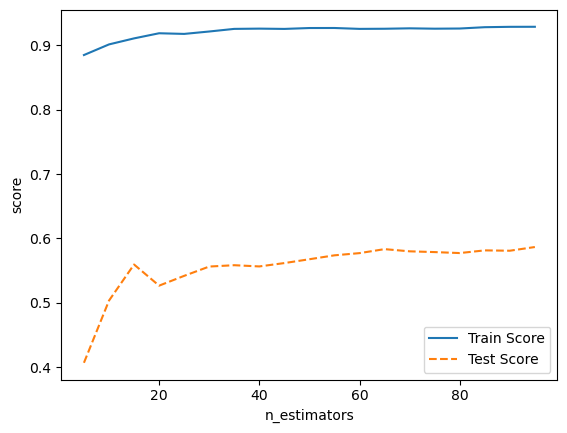

In [85]:
plt.plot(para_n_tree, train_score, linestyle="-", label="Train Score")
plt.plot(para_n_tree, test_score, linestyle="--", label="Test Score")
plt.ylabel("score");plt.xlabel("n_estimators")
plt.legend()

In [86]:
train_score = []; test_score = []
para_leaf = [n_leaf * 10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state=1234, n_estimators=15, min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSampelsLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)

,MinSampelsLeaf,TrainScore,TestScore
0,10,0.636,0.566
1,20,0.499,0.497
2,30,0.417,0.457
3,40,0.352,0.420
4,50,0.331,0.413
5,60,0.238,0.192
6,70,0.211,0.152
7,80,0.219,0.212
8,90,0.173,0.160
9,100,-0.000,-0.010


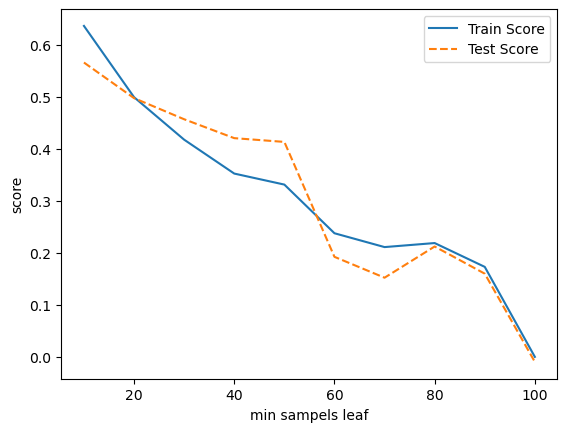

In [87]:
plt.plot(para_leaf, train_score, linestyle="-", label="Train Score")
plt.plot(para_leaf, test_score, linestyle="--", label="Test Score")
plt.ylabel("score");plt.xlabel("min sampels leaf")
plt.legend()

In [88]:
train_score = []; test_score = []
para_split = [n_split * 2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state=1234, n_estimators=15,min_samples_leaf=10, min_samples_split=v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.636,0.566
1,6,0.636,0.566
2,8,0.636,0.566
3,10,0.636,0.566
4,12,0.636,0.566
5,14,0.636,0.566
6,16,0.636,0.566
7,18,0.636,0.566
8,20,0.636,0.566
9,22,0.629,0.564


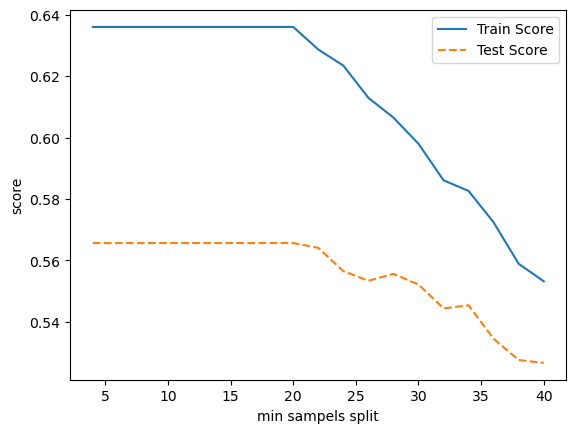

In [89]:
plt.plot(para_split, train_score, linestyle="-", label="Train Score")
plt.plot(para_split, test_score, linestyle="--", label="Test Score")
plt.ylabel("score");plt.xlabel("min sampels split")
plt.legend()

In [90]:
train_score = []; test_score = []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state=1234, n_estimators=15,min_samples_leaf=10, min_samples_split=20, max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.281,0.334
1,2,0.433,0.491
2,3,0.534,0.560
3,4,0.594,0.561
4,5,0.626,0.561
5,6,0.635,0.563
6,7,0.636,0.566
7,8,0.636,0.566
8,9,0.636,0.566
9,10,0.636,0.566


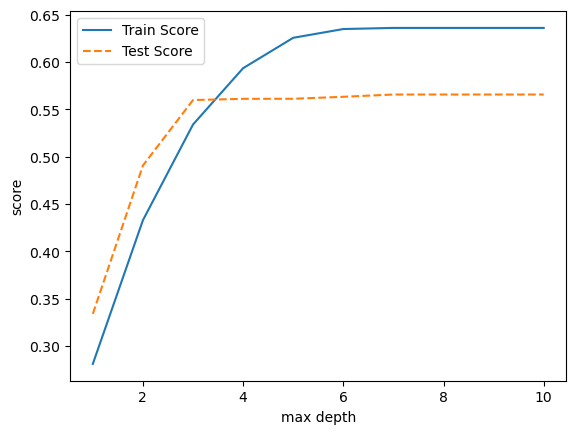

In [91]:
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, test_score, linestyle="--", label="Test Score")
plt.ylabel("score");plt.xlabel("max depth")
plt.legend()

In [92]:
rf_final = RandomForestRegressor(random_state=1234, n_estimators=15, min_samples_leaf=10, min_samples_split=20, max_depth=4)
rf_final.fit(df_train_x, df_train_y)

print("Score on training set:{:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on test set:{:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set:0.594
Score on test set:0.561


In [93]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
2,CO,0.581
0,O3,0.118
9,Season,0.071
4,WIND_DIR,0.063
8,Year,0.058
7,CLOUD,0.053
1,NO2,0.031
5,HUMIDITY,0.011
6,ATM_PRESS,0.008
3,WIND,0.006


Text(0, 0.5, 'Variable')

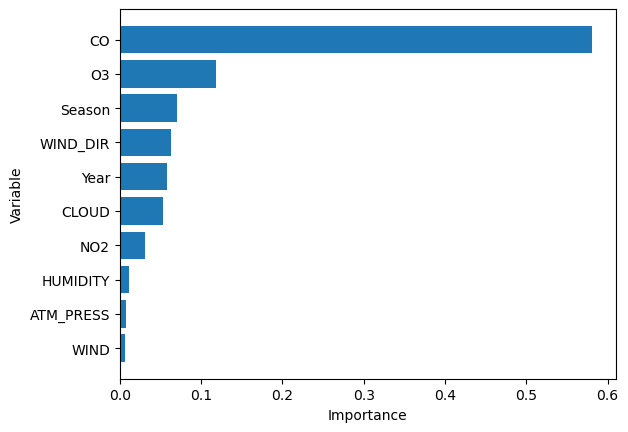

In [94]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width=df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("Importance")
plt.ylabel("Variable")

#### 3) Gradient Boosting

In [96]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [97]:
df_raw_y = df_raw_dummy["PM10"]
df_raw_x = df_raw_dummy.drop("PM10", axis = 1, inplace = False)

In [98]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.4, random_state = 1234)
#train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size=test데이터 비율, random_state:random seed)
print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (219, 10)
train data Y size: (219,)
test data X size: (147, 10)
test data Y size: (147,)


In [99]:
gb_uncustomized = GradientBoostingRegressor(random_state = 1234)
gb_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.939
Score on test set: 0.409


In [100]:
train_score = []; test_score = []
para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators= v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n["Estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

df_score_n.round(3)

,Estimators,TrainScore,TestScore
0,10,0.534,0.322
1,20,0.702,0.398
2,30,0.779,0.405
3,40,0.830,0.415
4,50,0.865,0.427
5,60,0.885,0.425
6,70,0.903,0.422
7,80,0.917,0.422
8,90,0.929,0.414
9,100,0.939,0.409


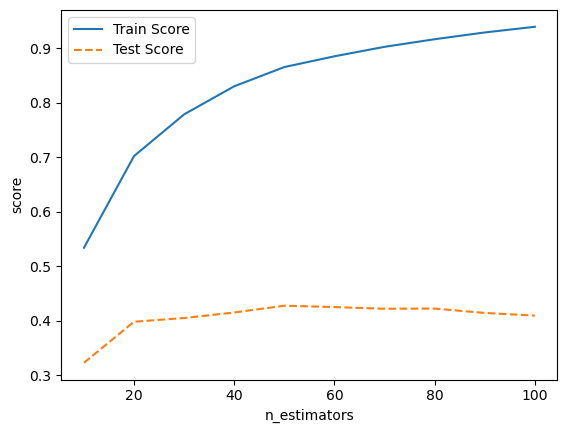

In [101]:
plt.plot(para_n_tree, train_score, linestyle="-", label="Train Score")
plt.plot(para_n_tree, test_score, linestyle="--", label="Test Score")
plt.ylabel("score");plt.xlabel("n_estimators")
plt.legend()

In [102]:
train_score = []; test_score = []
para_n_tree = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = GradientBoostingRegressor(random_state=1234, n_estimators=20,min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,10,0.662,0.399
1,20,0.614,0.392
2,30,0.581,0.376
3,40,0.499,0.353
4,50,0.468,0.318
5,60,0.404,0.309
6,70,0.290,0.197
7,80,0.284,0.197
8,90,0.283,0.193
9,100,0.279,0.181


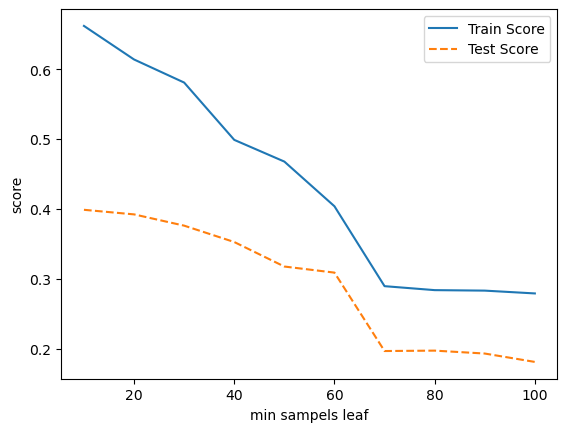

In [103]:
plt.plot(para_leaf, train_score, linestyle="-", label="Train Score")
plt.plot(para_leaf, test_score, linestyle="--", label="Test Score")
plt.ylabel("score");plt.xlabel("min sampels leaf")
plt.legend()

In [104]:
train_score = []; test_score = []
para_split = [n_split * 2 for n_split in range(1,21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=20,min_samples_leaf=30, min_samples_split=v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,2,0.581,0.376
1,4,0.581,0.376
2,6,0.581,0.376
3,8,0.581,0.376
4,10,0.581,0.376
5,12,0.581,0.376
6,14,0.581,0.376
7,16,0.581,0.376
8,18,0.581,0.376
9,20,0.581,0.376


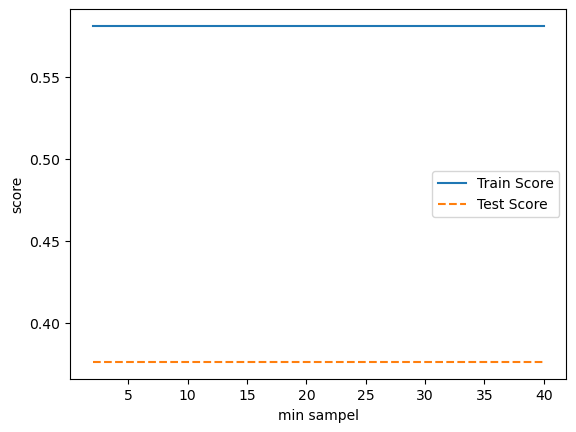

In [105]:
plt.plot(para_split, train_score, linestyle="-", label="Train Score")
plt.plot(para_split, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("min sampel")
plt.legend()

In [106]:
train_score = []; test_score = []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=20,min_samples_leaf=30, max_depth = v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.365,0.286
1,2,0.528,0.356
2,3,0.581,0.376
3,4,0.597,0.383
4,5,0.596,0.385
5,6,0.596,0.385
6,7,0.596,0.385
7,8,0.596,0.385
8,9,0.596,0.385
9,10,0.596,0.385


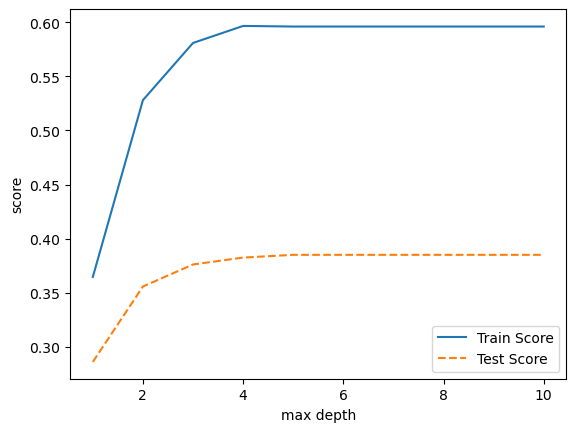

In [107]:
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, test_score, linestyle="--", label="Test Score")
plt.ylabel("score");plt.xlabel("max depth")
plt.legend()

In [108]:
train_score = []; test_score = []
para_lr = [lr * 0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=20,min_samples_leaf=30, max_depth =3, learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["LearningRate"] = para_lr
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

df_score_depth.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,0.581,0.376
1,0.2,0.677,0.391
2,0.3,0.729,0.381
3,0.4,0.771,0.337
4,0.5,0.797,0.295
5,0.6,0.805,0.317
6,0.7,0.814,0.313
7,0.8,0.837,0.202
8,0.9,0.843,0.168


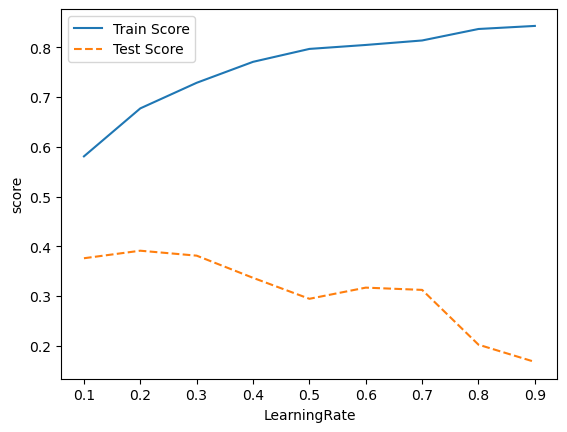

In [109]:
plt.plot(para_lr, train_score, linestyle="-", label="Train Score")
plt.plot(para_lr, test_score, linestyle="--", label="Test Score")
plt.ylabel("score");plt.xlabel("LearningRate")
plt.legend()

In [110]:
gb_final = GradientBoostingRegressor(random_state=1234, n_estimators=20, min_samples_leaf=30, max_depth=3,learning_rate=0.2)
gb_final.fit(df_train_x, df_train_y)

print("Score on training set:{:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Score on test set:{:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set:0.677
Score on test set:0.391


In [111]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=gb_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
2,CO,0.475
0,O3,0.095
4,WIND_DIR,0.095
7,CLOUD,0.082
8,Year,0.076
1,NO2,0.068
9,Season,0.053
5,HUMIDITY,0.029
6,ATM_PRESS,0.018
3,WIND,0.010


Text(0, 0.5, 'Variable')

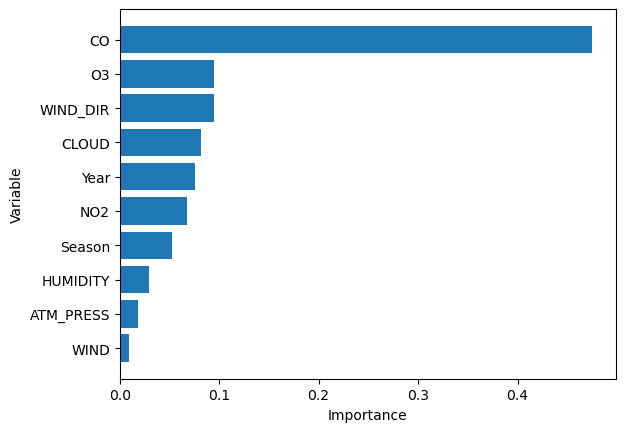

In [112]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width=df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("Importance")
plt.ylabel("Variable")

# Model Evaluation

In [114]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# RMSE: root mean squared error
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# MAPE: mean abslute percentage error
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [115]:
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     40.67
Date:                Tue, 31 Dec 2024   Prob (F-statistic):           5.13e-53
Time:                        16:07:54   Log-Likelihood:                -1392.0
No. Observations:                 366   AIC:                             2806.
Df Residuals:                     355   BIC:                             2849.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9404.8628   3244.763     -2.898      0.0

Multi Linear Regression model explains 52% of the data.

In [117]:
rf_model = RandomForestRegressor(random_state=1234, n_estimators=50, min_samples_leaf=5, min_samples_split=10, max_depth=8)
rf_model.fit(df_train_x, df_train_y)

RandomForestRegressor(max_depth=8, min_samples_leaf=5, min_samples_split=10,
                      n_estimators=50, random_state=1234)

In [118]:
gb_model = GradientBoostingRegressor(random_state=1234, n_estimators=20, min_samples_leaf=30, max_depth=3,learning_rate=0.2)
gb_model.fit(df_train_x, df_train_y)

GradientBoostingRegressor(learning_rate=0.2, min_samples_leaf=30,
                          n_estimators=20, random_state=1234)

In [119]:
models = ["Random Forest", "Gardient Boost"]

mse, rmse, mae, mape = [],[],[],[]

In [120]:
# Preidction
rf_y_pred = rf_model.predict(df_test_x)

# Evaluation
mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

In [121]:
# Prediction
gb_y_pred = gb_model.predict(df_test_x)

# Evaluation
mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

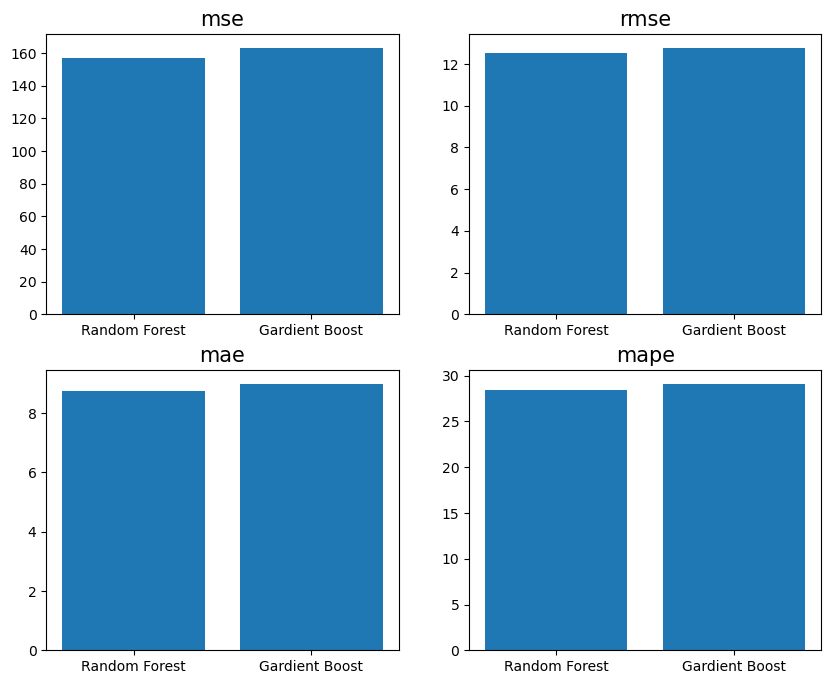

In [122]:
fig, ax = plt.subplots(2,2, figsize = (10,8))
ax[0,0].bar(models, mse)
ax[0,0].set_title("mse").set_fontsize(15)

ax[0,1].bar(models, rmse)
ax[0,1].set_title("rmse").set_fontsize(15)

ax[1,0].bar(models, mae)
ax[1,0].set_title("mae").set_fontsize(15)

ax[1,1].bar(models, mape)
ax[1,1].set_title("mape").set_fontsize(15)


In this case, Random Forest Model is better than the Gradent Boost Model.